![UiO Logo](https://www.uio.no/om/designmanual/images/1-2-3-logo-universitetet-i-oslo.jpg "UiO Logo")

# Linear Regression Example
by Marius Aasan (mariuaas$(\alpha)$math$\cdot$uio$\cdot$no) - IN3050/4050 Group 3 - 22.02.2021 1015-1200

This is an algebraic formulation of [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) using the [pseudoinverse](https://en.wikipedia.org/wiki/Generalized_inverse). In the mandatory assignment you will use gradient descent for linear regression.

In [1]:
%matplotlib inline

Import our good old libraries :)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

FIrstly, we generate some data. We define a one dimensional line $w x + w_0$ and add standard normal noise $\varepsilon \sim \mathcal N (0, 1)$ such that our data is on the matrix form

$$ 
\begin{align}
f(x) + \varepsilon &= y \\
Xw + w_0 + \varepsilon &= y \\
\end{align}
$$

where the data is in a matrix $X$ on the form

$$
\begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1m} \\ 
x_{21} & x_{22} & \dots & x_{2m} \\ 
\dots  & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \dots & x_{nm} \\ 
\end{bmatrix}.
$$


For a one dimensional problem, this is simply $w x + w_0 + \varepsilon = y$, which by the properties of the normal distribution can be rewritten as a normal distribution with mean $\mu = w x + w_0$, so we have a distribution $\mathcal N (w x + w_0, 1)$. 

For a matrix formulation, we augment our data to generate a design matrix by
$$
\begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1m} \\ 
1 & x_{21} & x_{22} & \dots & x_{2m} \\ 
1 & \dots  & \dots & \dots & \dots\\
1 & x_{n1} & x_{n2} & \dots & x_{nm} \\ 
\end{bmatrix}.
$$

so our weights $w$ includes our bias term $w_0$ yielding $w = [w_0, w_1, \dots, w_m]^T$. To find these weights we then apply some matrix algebra

$$
\begin{align}
X \hat w &= y \\
X^T X \hat w &= X^T y \\
(X^T X)^{-1} (X^T X) \hat w &= (X^T X)^{-1} X^T y \\
\hat w &= (X^T X)^{-1} X^T y \\
\end{align}
$$

The term $X^+ = (X^T X)^{-1} X^T$ is called the pseudoinverse. 

For our data, we generate a simple one dimensional problem by $w_0 = 7.2, w_1 = -2.5$.

In [3]:
x = np.linspace(0, 1, 200)
eps = np.random.randn(200)

w = np.array([7.2, -2.5])
y = x * w[1] + eps + w[0]

Now we have a linear regression problem. Lets visualize the data and the solution we want to find.

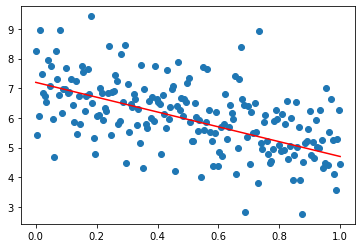

In [4]:
plt.scatter(x, y)
plt.plot(x, x * w[1] + w[0], color="red")

Now we combine all our data and a vector of 1s to generate our design matrix.

In [7]:
X = np.vstack([np.ones(200), x]).T

To make the data non-ordered, we shuffle the datapoints.

In [8]:
indices = np.random.choice(np.arange(200), size=200, replace=False)
X = X[indices]
y = y[indices]

Now we estimate our $\hat w$ using the pseudoinverse.

In [9]:
what = np.linalg.inv(X.T @ X + 0.00001) @ X.T @ y

That was it! Pretty simple right? How does it compare to our true weights?

In [10]:
print(w)
print(what)

[ 7.2 -2.5]
[ 7.14166717 -2.14408946]


Great! The estimates are quite accurate! Lastly, let's visualize our data.

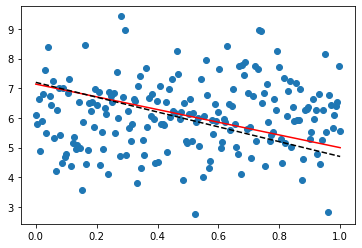

In [11]:
plt.scatter(x, y)
plt.plot(x, x * what[1] + what[0], color="red")
plt.plot(x, x * w[1] + w[0], "--", color="black");

This is linear regression computed algebraically, sometimes called an Ordinary Least Squares (OLS) regression. 